In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def add_conv_layers(model, input_shape, conv_filters, kernel_size, activation, pool_size, dropout_rates):
    model.add(Input(shape=input_shape))
    for i, filters in enumerate(conv_filters):
        model.add(Conv2D(filters, kernel_size, activation=activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size))
        model.add(Dropout(dropout_rates[i]))

In [3]:
def add_dense_layers(model, dense_units, activation, dropout_rate, num_classes, l2_reg):
    model.add(Flatten())
    model.add(Dense(dense_units, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

In [4]:
def compile_model(model, learning_rate):
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [5]:
def create_model(input_shape, num_classes, conv_filters=[32, 64, 128], 
                 kernel_size=(3, 3), activation='relu', 
                 pool_size=(2, 2), dropout_rates=[0.25, 0.25, 0.25, 0.5], 
                 dense_units=256, learning_rate=0.0001, l2_reg=0.01):
    
    model = Sequential()
    
    add_conv_layers(model, input_shape, conv_filters, kernel_size, activation, pool_size, dropout_rates)
    add_dense_layers(model, dense_units, activation, dropout_rates[-1], num_classes, l2_reg)
    compile_model(model, learning_rate)
    
    return model

In [6]:
def prepare_data(train_dir, target_size=(128, 128), batch_size=32, validation_split=0.1):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

In [7]:
def train_model(model, train_generator, validation_generator, epochs=50, patience=8):
    steps_per_epoch = train_generator.samples // train_generator.batch_size
    validation_steps = validation_generator.samples // validation_generator.batch_size
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=[early_stopping]
    )

    return history

In [8]:
def plot(history):
  # Vẽ biểu đồ mất mát
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Loss over epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Vẽ biểu đồ độ chính xác
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy over epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

Found 8911 images belonging to 6 classes.
Found 990 images belonging to 6 classes.
Epoch 1/50


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


278/278 ━━━━━━━━━━━━━━━━━━━━ 112s 391ms/step - accuracy: 0.3021 - loss: 6.9560 - val_accuracy: 0.1729 - val_loss: 18.5328
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.4375 - loss: 5.3578 - val_accuracy: 0.1000 - val_loss: 21.1838
Epoch 3/50


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


278/278 ━━━━━━━━━━━━━━━━━━━━ 80s 287ms/step - accuracy: 0.4570 - loss: 5.0118 - val_accuracy: 0.2281 - val_loss: 7.7649
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.3750 - loss: 4.4609 - val_accuracy: 0.2667 - val_loss: 7.2997
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 81s 290ms/step - accuracy: 0.5079 - loss: 3.9094 - val_accuracy: 0.2917 - val_loss: 4.0619
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.5938 - loss: 3.3967 - val_accuracy: 0.3000 - val_loss: 3.7540
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 95s 339ms/step - accuracy: 0.5289 - loss: 3.1078 - val_accuracy: 0.3115 - val_loss: 3.5418
Epoch 8/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.5312 - loss: 2.7083 - val_accuracy: 0.2667 - val_loss: 3.6696
Epoch 9/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 87s 311ms/step - accuracy: 0.5420 - loss: 2.5607 - val_accuracy: 0.3510 - val_loss: 2.8883
Epoch 10/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.5625 - loss: 2.2768 - val_ac

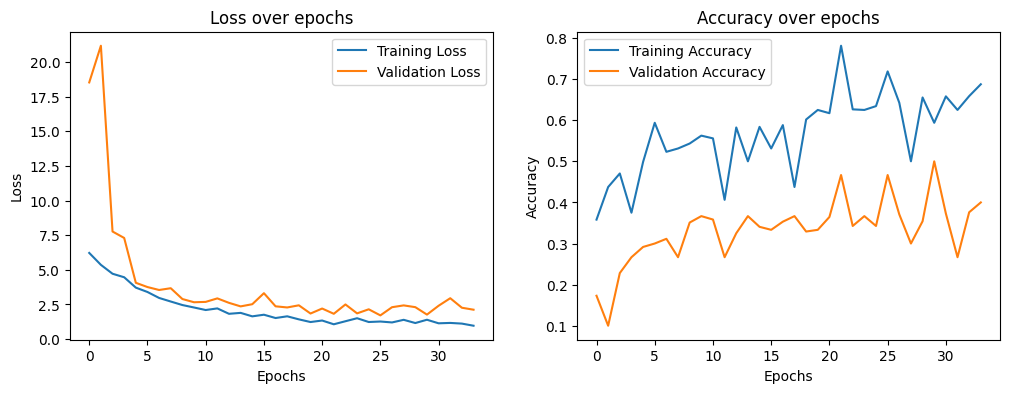

In [9]:
train_dir = 'D:/data_analysis/speech_emotion_recognition/data/EnglishDataset/split_data/train'
train_generator, validation_generator = prepare_data(train_dir)

num_classes = len(train_generator.class_indices)
input_shape = (128, 128, 3)
model = create_model(input_shape, num_classes, conv_filters=[32, 64, 128], 
                    kernel_size=(3, 3), activation='relu', 
                    pool_size=(2, 2), dropout_rates=[0.25, 0.25, 0.25, 0.5], 
                    dense_units=256, learning_rate=0.0001, l2_reg=0.01)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size
history = train_model(model, train_generator, validation_generator)
plot(history)

# Lưu mô hình đã huấn luyện
model.save('emotion_recognition_model.h5')